In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict

In [74]:
df = pd.read_csv('seattleWeather_1948-2017.csv', index_col=['DATE'], parse_dates=['DATE'])
df

,PRCP,TMAX,TMIN,RAIN
DATE,,,,
1948-01-01,0.47,51,42,True
1948-01-02,0.59,45,36,True
1948-01-03,0.42,45,35,True
1948-01-04,0.31,45,34,True
1948-01-05,0.17,45,32,True
...,...,...,...,...
2017-12-10,0.00,49,34,False
2017-12-11,0.00,49,29,False
2017-12-12,0.00,46,32,False


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25551 entries, 1948-01-01 to 2017-12-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    25548 non-null  float64
 1   TMAX    25551 non-null  int64  
 2   TMIN    25551 non-null  int64  
 3   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 998.1+ KB


In [76]:

df['PRCP'].fillna(0, inplace=True)
df['RAIN'].fillna(False, inplace=True)

In [77]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25551 entries, 1948-01-01 to 2017-12-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    25551 non-null  float64
 1   TMAX    25551 non-null  int64  
 2   TMIN    25551 non-null  int64  
 3   RAIN    25551 non-null  bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 823.4 KB


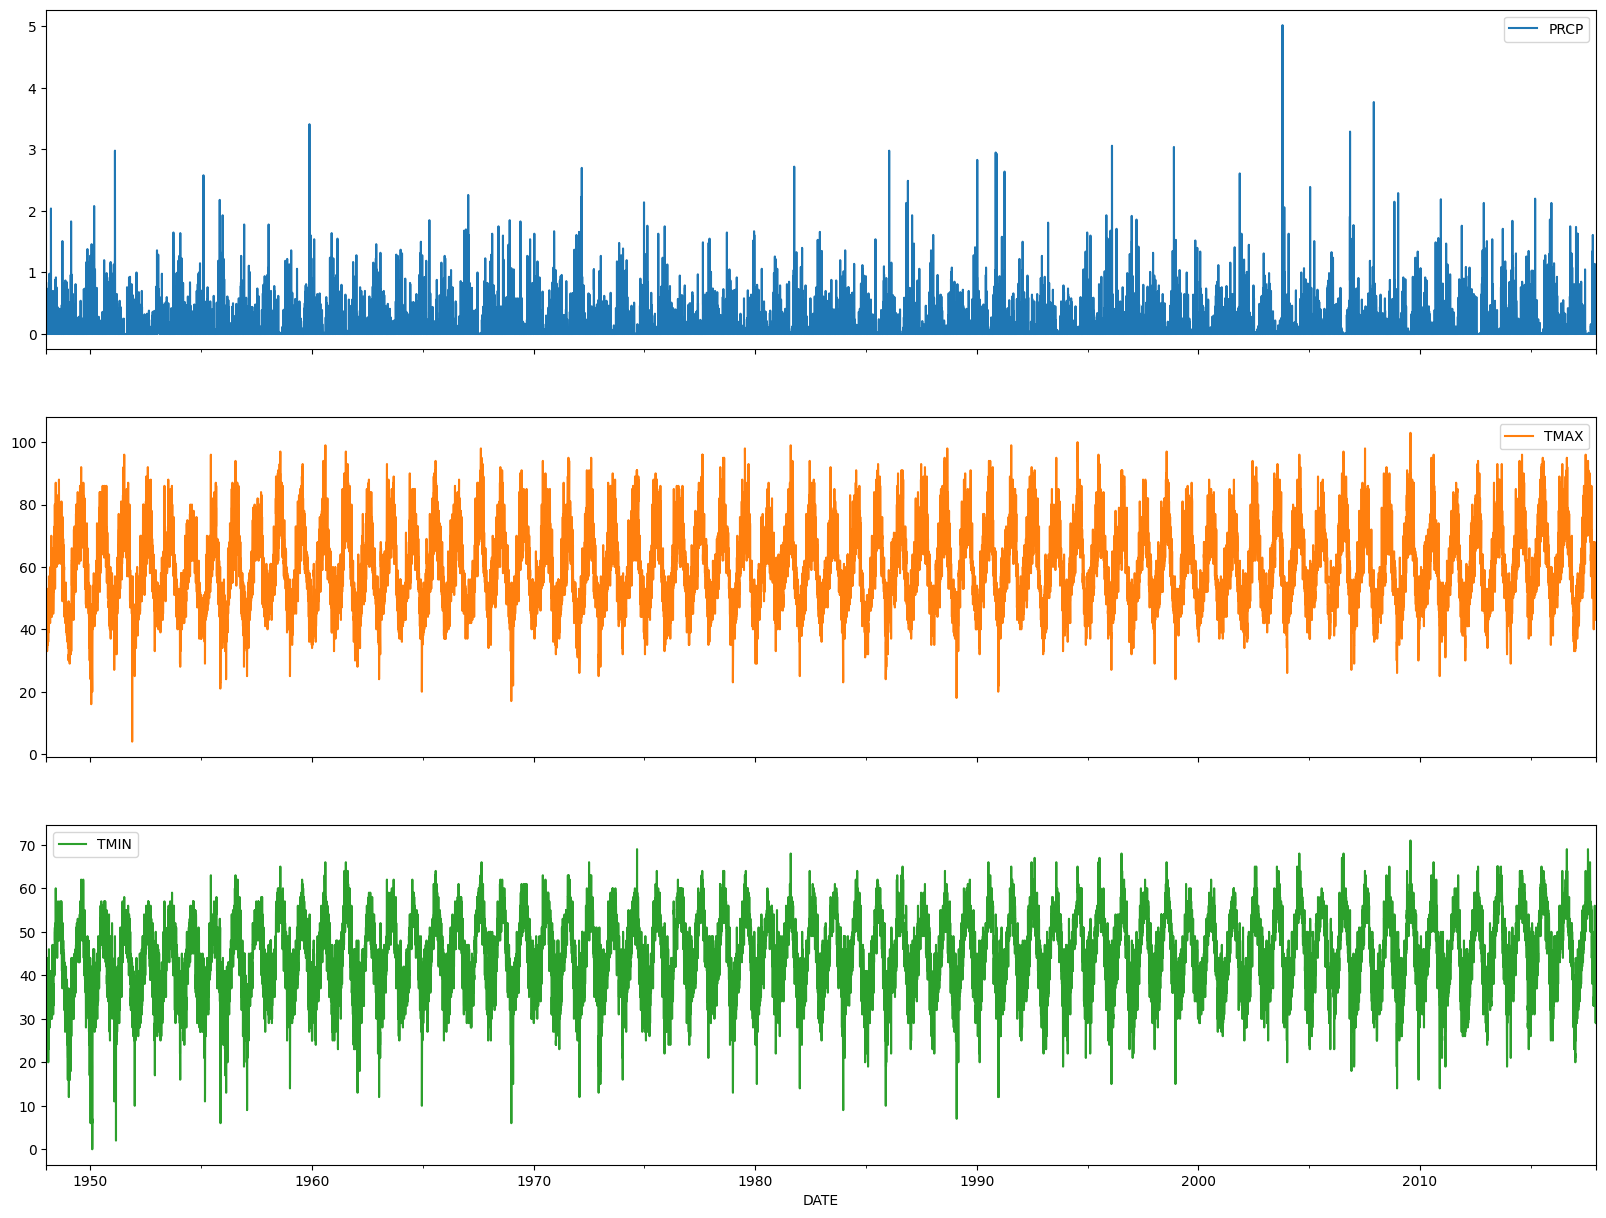

In [78]:
df.plot(figsize=(20, 15), subplots=True)

plt.show()

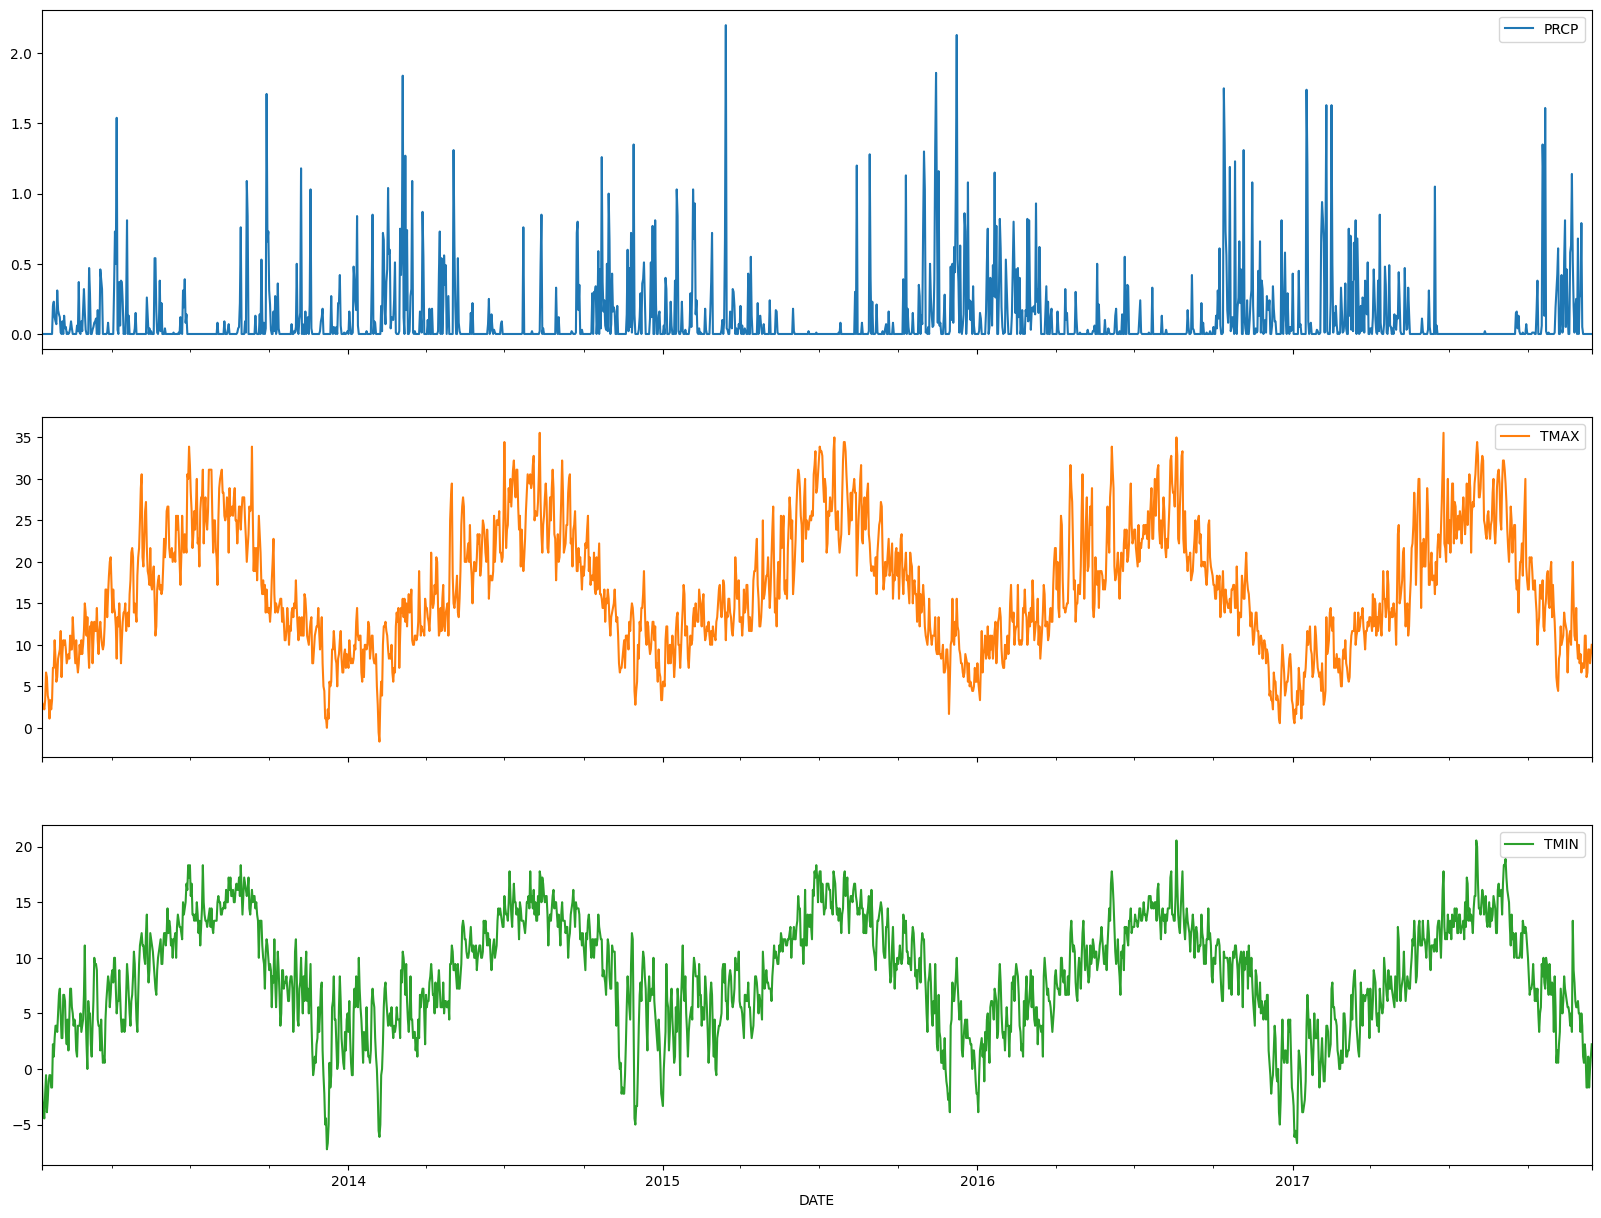

In [95]:
df.loc[df.index[-1800:]].plot(figsize=(20, 15), subplots=True)
plt.show()

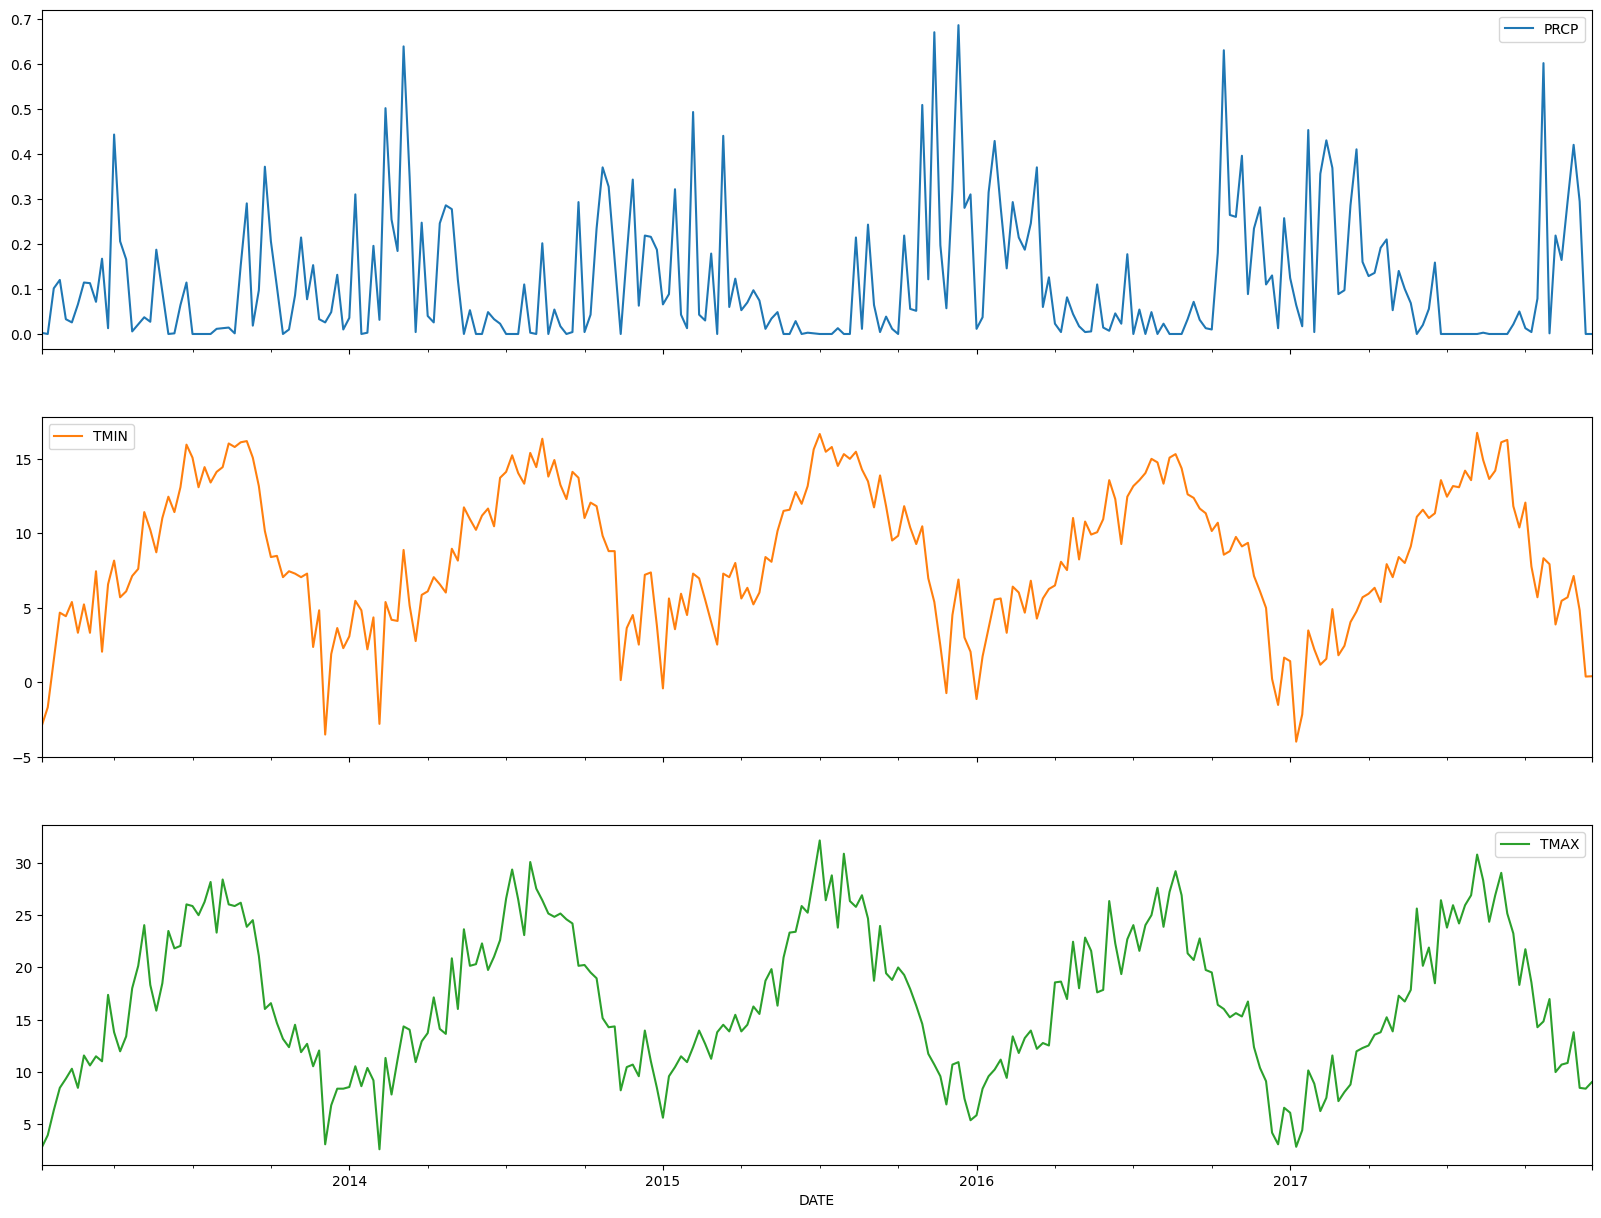

In [96]:
df[['PRCP', 'TMIN', 'TMAX']].loc[df.index[-1800:]].resample('W').mean().plot(figsize=(20, 15), subplots=True)
plt.show()

In [97]:
prcp_decomposition = smt.seasonal_decompose(df['PRCP'].loc[df.index[-1800:]].resample('W').mean())

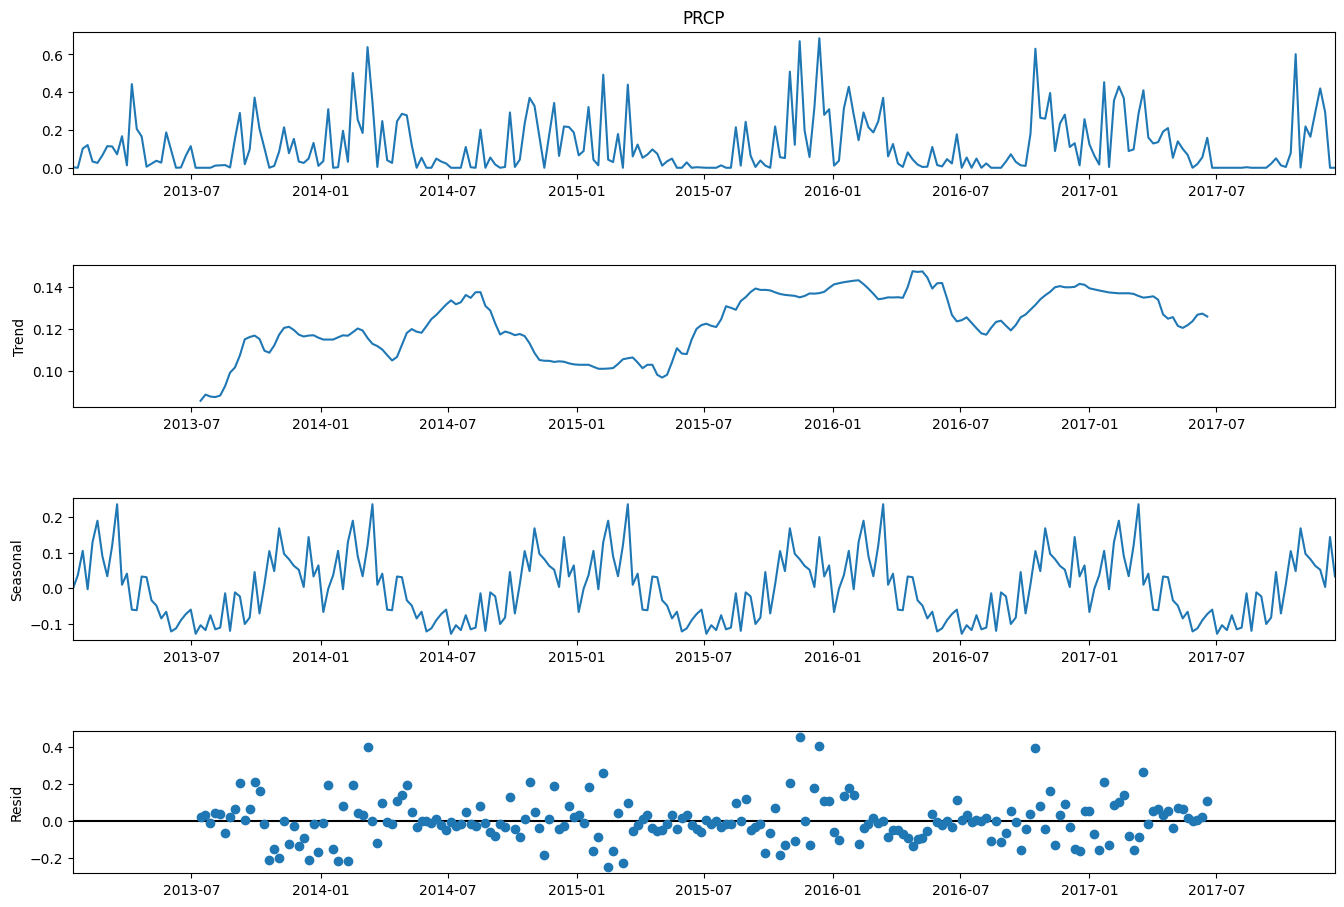

In [98]:
fig = prcp_decomposition.plot()

fig.set_size_inches(15, 10)

plt.show()

/Users/andrey/Library/Python/3.9/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


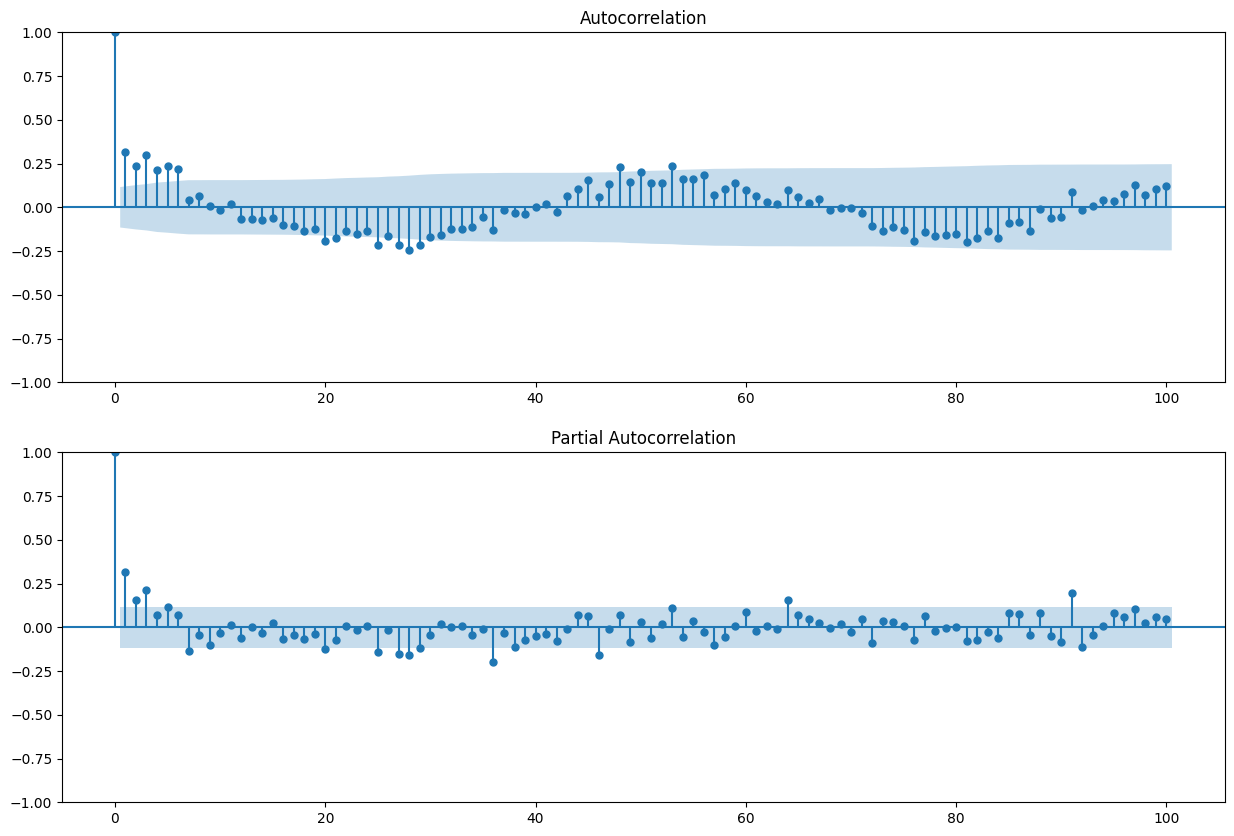

In [83]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(df['PRCP'].loc[df.index[-2000:]].resample('W').mean(), ax=ax[0], lags=100)
ax[1] = plot_pacf(df['PRCP'].loc[df.index[-2000:]].resample('W').mean(), ax=ax[1], lags=100)

In [84]:
df[['TMIN', 'TMAX']] = (df[['TMIN', 'TMAX']] - 32) * 5 / 9

In [85]:
df[['TMIN', 'TMAX']].describe()

,TMIN,TMAX
count,25551.000000,25551.000000
mean,6.952348,15.302337
std,4.940464,7.096102
min,-17.777778,-15.555556
25%,3.333333,10.000000
50%,7.222222,14.444444
75%,11.111111,20.555556
max,21.666667,39.444444


In [86]:
corrmat = df[['PRCP', 'TMIN', 'TMAX']].corr()

corrmat

,PRCP,TMIN,TMAX
PRCP,1.000000,-0.064404,-0.226765
TMIN,-0.064404,1.000000,0.860684
TMAX,-0.226765,0.860684,1.000000


In [99]:
def dickey_fuller_test(series):
    test = smt.adfuller(series, autolag='AIC')
    print('adf: ', test[0])
    print('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0] > test[4]['5%']: 
        print('There are unit roots, the series is not stationary.')
    else:
        print('There are no unit roots, the series is stationary.')


dickey_fuller_test(df['PRCP'].loc['2010-01-01':])

adf:  -7.492778701855627
p-value:  4.460052434093296e-11
Critical values:  {'1%': -3.432621827844222, '5%': -2.862543739830824, '10%': -2.5673043196836782}
There are no unit roots, the series is stationary.


In [88]:
train_data = df['PRCP'].loc['2010-01-01':]
train_data.describe()

count    2905.000000
mean        0.119194
std         0.256682
min         0.000000
25%         0.000000
50%         0.000000
75%         0.120000
max         2.200000
Name: PRCP, dtype: float64

In [89]:
train_data

DATE
2010-01-01    0.40
2010-01-02    0.06
2010-01-03    0.03
2010-01-04    0.98
2010-01-05    0.14
              ... 
2017-12-10    0.00
2017-12-11    0.00
2017-12-12    0.00
2017-12-13    0.00
2017-12-14    0.00
Name: PRCP, Length: 2905, dtype: float64

In [90]:
model = smt.ARIMA(train_data, order=(3, 0, 1)).fit()

/Users/andrey/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/andrey/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/andrey/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/andrey/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/andrey/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PRCP   No. Observations:                 2905
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  16.392
Date:                Fri, 28 Apr 2023   AIC                            -20.783
Time:                        00:43:41   BIC                             15.062
Sample:                    01-01-2010   HQIC                            -7.869
                         - 12-14-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1205      0.027      4.476      0.000       0.068       0.173
ar.L1          1.2252      0.017     70.135      0.000       1.191       1.259
ar.L2         -0.2058      0.020    -10.527      0.000      -0.244      -0.168
ar.L3         -0.0342      0.016     -2.182      0.029      -0.065      -0.003
ma.L1         -0.9496      0.014    -67.604      0.000      -0.977      -0.922
sigma2         0.0579      0.001     66.824      0.000       0.056       0.060
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             31850.98
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             3.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

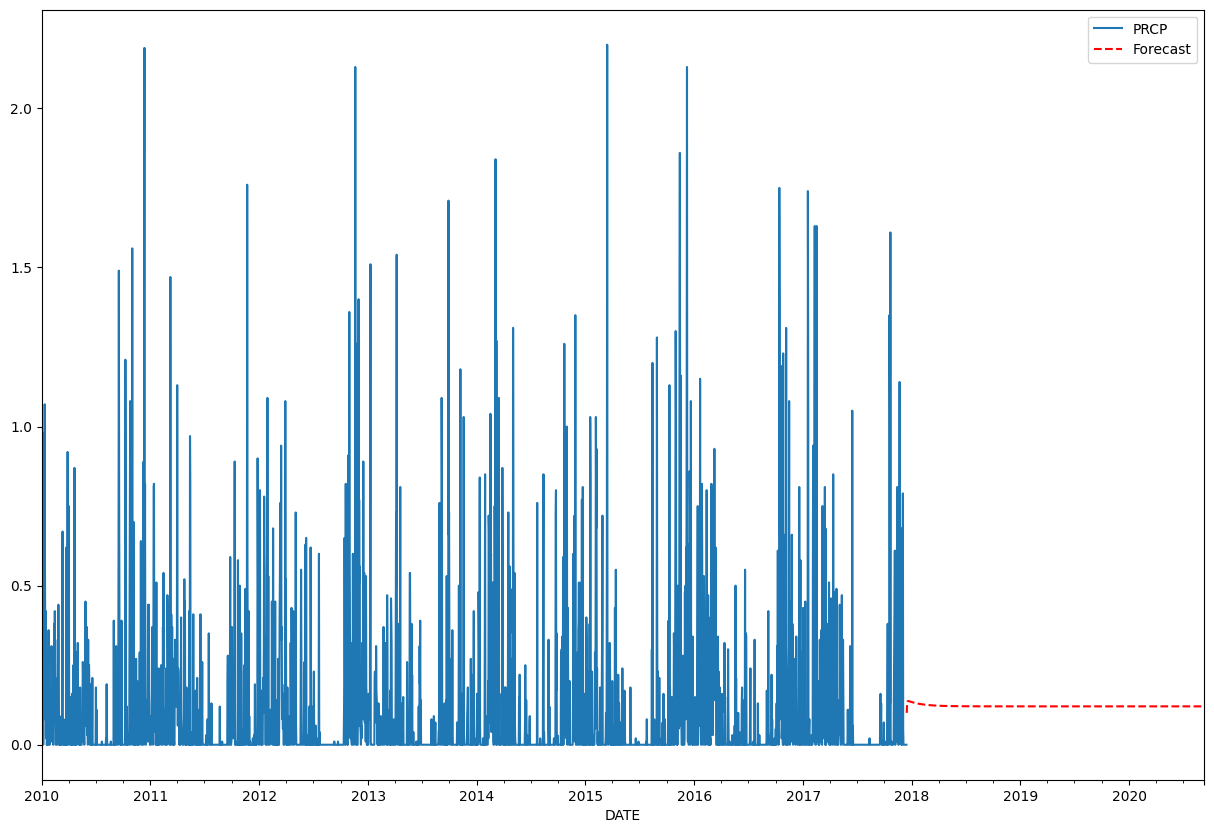

In [94]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = train_data.plot(ax=ax)
forecast = model.forecast(steps=1000)
forecast.plot(ax=ax, style='r--', label='Forecast')
plt.legend()
plt.show()
